# Imports

In [118]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [119]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Constants

In [120]:
X_TRAIN_PATH = "MNIST/digit_xtrain.csv"
X_TEST_PATH = "MNIST/digit_xtest.csv"
Y_TRAIN_PATH = "MNIST/digit_ytrain.csv"
Y_TEST_PATH = "MNIST/digit_ytest.csv"

NR_CLASSES = 10
VALIDATION_SIZE = 10000
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
CHANNELS = 1
TOTAL_INPUTS = IMAGE_HEIGHT * IMAGE_WIDTH * CHANNELS

# Get the Data

In [121]:
%%time
y_train_all = np.loadtxt(Y_TRAIN_PATH, delimiter=",", dtype=int)

Wall time: 108 ms


In [122]:
%%time
y_test = np.loadtxt(Y_TEST_PATH, delimiter=",", dtype=int)

Wall time: 19 ms


In [123]:
%%time
x_train_all = np.loadtxt(X_TRAIN_PATH, delimiter=",", dtype=int)

Wall time: 13.7 s


In [124]:
%%time
x_test = np.loadtxt(X_TEST_PATH, delimiter=",", dtype=int)

Wall time: 2.43 s


# Explore

In [125]:
x_train_all.shape

(60000, 784)

In [126]:
x_train_all[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [127]:
x_train_all[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

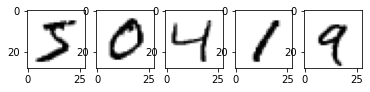

In [128]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(np.reshape(x_train_all[0], (28, 28)), cmap = 'gray_r')
ax2.imshow(np.reshape(x_train_all[1], (28, 28)), cmap = 'gray_r')
ax3.imshow(np.reshape(x_train_all[2], (28, 28)), cmap = 'gray_r')
ax4.imshow(np.reshape(x_train_all[3], (28, 28)), cmap = 'gray_r')
ax5.imshow(np.reshape(x_train_all[4], (28, 28)), cmap = 'gray_r')

In [129]:
y_train_all.shape

(60000,)

In [130]:
y_test.shape

(10000,)

# Data Preprocessing

In [131]:
# Re_scale
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

### Convert target values to one-hot encoding

In [132]:
y_train_all = np.eye(NR_CLASSES)[y_train_all]
y_train_all.shape

(60000, 10)

In [133]:
y_test = np.eye(NR_CLASSES)[y_test]
y_test.shape

(10000, 10)

### Create validation data set from training data

In [134]:
x_val = x_train_all[:VALIDATION_SIZE]
x_train = x_train_all[VALIDATION_SIZE:]

y_val = y_train_all[:VALIDATION_SIZE]
y_train = y_train_all[VALIDATION_SIZE:]

In [135]:
x_train.shape

(50000, 784)

In [136]:
x_val.shape

(10000, 784)

# Setup Tensorflow Graph

In [161]:
X = tf.placeholder(tf.float32, shape=[None, TOTAL_INPUTS])
Y = tf.placeholder(tf.float32, shape=[None, NR_CLASSES])

### Neural Network Architecture

#### Hyperparameters

In [162]:
nr_epochs = 5
learning_rate = 1e-4

n_hidden1 = 512
n_hidden2 = 64

#### Layer 1

In [163]:
initial_w1 = tf.truncated_normal(shape=[TOTAL_INPUTS, n_hidden1], stddev=0.1, seed=42)
w1 = tf.Variable(initial_value=initial_w1)

In [164]:
initial_b1 = tf.constant(value=0.0, shape=[n_hidden1])
b1 = tf.Variable(initial_value=initial_b1)

In [165]:
layer1_in = tf.matmul(X, w1) + b1

In [166]:
layer1_out = tf.nn.relu(layer1_in)

#### Layer 2

In [167]:
initial_w2 = tf.truncated_normal(shape=[n_hidden1, n_hidden2], stddev=0.1, seed=42)
w2 = tf.Variable(initial_value=initial_w2)

In [168]:
initial_b2 = tf.constant(value=0.0, shape=[n_hidden2])
b2 = tf.Variable(initial_value=initial_b2)

In [169]:
layer2_in = layer1_in = tf.matmul(layer1_out, w2) + b2

In [170]:
layer2_out = tf.nn.relu(layer2_in)

#### Output Layer (3)

In [171]:
initial_w3 = tf.truncated_normal(shape=[n_hidden2, NR_CLASSES], stddev=0.1, seed=42)
w3 = tf.Variable(initial_value=initial_w3)

initial_b3 = tf.constant(value=0.0, shape=[NR_CLASSES])
b3 = tf.Variable(initial_value=initial_b3)

layer3_in = tf.matmul(layer2_out, w3) + b3
output = tf.nn.softmax(layer3_in)

# Loss, Optimisation & Metrics

#### Defining Loss Function

In [172]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=output))

#### Defining Optimizer

In [173]:
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(loss)

#### Accuracy Metric

In [174]:
correct_pred = tf.equal(tf.argmax(output, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Run Session

In [175]:
sess = tf.Session()

In [176]:
# Initialize all the variables
init = tf.global_variables_initializer()
sess.run(init)

In [177]:
b3.eval(sess)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Batching the Data

In [178]:
size_of_batch = 1000

In [179]:
num_examples = y_train.shape[0]
nr_iterations = int(num_examples/size_of_batch)

index_in_epoch = 0

In [180]:
def next_batch(batch_size, data, labels):
    
    global num_examples
    global index_in_epoch
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > num_examples:
        start = 0
        index_in_epoch = batch_size
    
    end = index_in_epoch
    
    return data[start:end], labels[start:end]

In [181]:
for epoch in range(nr_epochs):
    
    for i in range(nr_iterations):
        
        batch_x, batch_y = next_batch(batch_size=size_of_batch,data=x_train, labels=y_train)
        feed_dictionary = {X:batch_x, Y:batch_y}
        sess.run(train_step, feed_dict=feed_dictionary)
        batch_accuracy = sess.run(fetches=[accuracy], feed_dict=feed_dictionary)
        
    print(f'Epoch {epoch} \t| Training Accuracy = {batch_accuracy}')
    
print("Done training")

Epoch 0 	| Training Accuracy = [0.084]
Epoch 1 	| Training Accuracy = [0.084]
Epoch 2 	| Training Accuracy = [0.084]
Epoch 3 	| Training Accuracy = [0.085]
Epoch 4 	| Training Accuracy = [0.085]
Done training
